In [5]:
import tensorflow.keras as keras
import pandas as pd

# Load in data from CSV files
train_df = pd.read_csv("sign_mnist_train.csv")
valid_df = pd.read_csv("sign_mnist_valid.csv")

# Separate out target values
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

# Separate out image vectors
x_train = train_df.values
x_valid = valid_df.values

# Turn scalar targets into binary categories
num_classes = 24
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

# Normalize image data
x_train = x_train / 255
x_valid = x_valid / 255

# Reshape the image data for the convolutional network
x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
)  

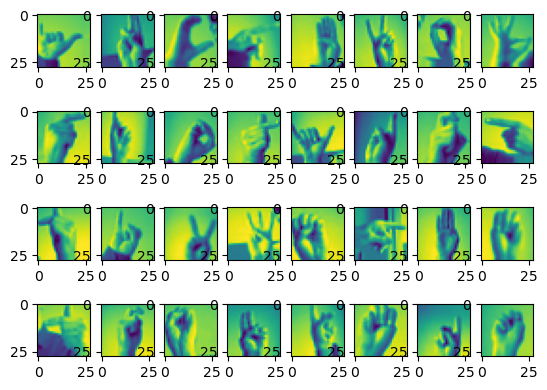

In [8]:
import matplotlib.pyplot as plt
import numpy as np
batch_size = 32
img_iter = datagen.flow(x_train, y_train, batch_size=batch_size)

x, y = img_iter.next()
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

In [9]:
datagen.fit(x_train)

In [10]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(img_iter,
          epochs=20,
          steps_per_epoch=len(x_train)/batch_size, # Run same number of steps we would if we were not using a generator.
          validation_data=(x_valid, y_valid))

Epoch 1/20
857/857 [==============================] - 62s 69ms/step - loss: 1.1463 - accuracy: 0.6334 - val_loss: 0.3308 - val_accuracy: 0.8829
Epoch 2/20
857/857 [==============================] - 58s 67ms/step - loss: 0.3146 - accuracy: 0.8931 - val_loss: 0.1720 - val_accuracy: 0.9526
Epoch 3/20
857/857 [==============================] - 57s 67ms/step - loss: 0.1965 - accuracy: 0.9340 - val_loss: 0.6745 - val_accuracy: 0.7902
Epoch 4/20
857/857 [==============================] - 57s 66ms/step - loss: 0.1449 - accuracy: 0.9522 - val_loss: 2.4865 - val_accuracy: 0.6240
Epoch 5/20
857/857 [==============================] - 57s 67ms/step - loss: 0.1167 - accuracy: 0.9615 - val_loss: 0.4960 - val_accuracy: 0.8687
Epoch 6/20
857/857 [==============================] - 57s 67ms/step - loss: 0.1049 - accuracy: 0.9660 - val_loss: 0.3464 - val_accuracy: 0.8806
Epoch 7/20
857/857 [==============================] - 57s 67ms/step - loss: 0.0922 - accuracy: 0.9709 - val_loss: 0.0818 - val_accuracy:

In [ ]:
model.save('asl_model')

In [ ]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)